In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns

# SENTINEL2

Se realizara un análisis de los datos disponibles en las bandas 4 y 8, bandas necesarias para calcular el NDVI 


## Banda 4 (Rojo)

In [2]:
# Cargar el archivo jp2 Sentinel 2
file_path = 'data/S2A_MSIL2A_20250424T152711_N0511_R025_T18PYU_20250425T012413.SAFE/GRANULE/L2A_T18PYU_A051388_20250424T152706/IMG_DATA/R10m/T18PYU_20250424T152711_B04_10m.jp2'
src_sentinel_B4 = rasterio.open(file_path)

### Información general del raster

In [3]:
# Abrir y leer los datos
with rasterio.open(file_path) as src_sentinel_B4:
    band4_sentinel = src_sentinel_B4.read(1)
    width = src_sentinel_B4.width
    height = src_sentinel_B4.height
    bands = src_sentinel_B4.count

# Imprimir dimensiones
print(f"Dimensiones datos (ancho x alto): {width} x {height}")
print(f"Número de bandas: {bands}")

Dimensiones datos (ancho x alto): 10980 x 10980
Número de bandas: 1


In [4]:
# Contar píxeles con valor 0
num_ceros = np.sum(band4_sentinel == 0)

print(f"Número de píxeles con valor 0: {num_ceros}")

Número de píxeles con valor 0: 0


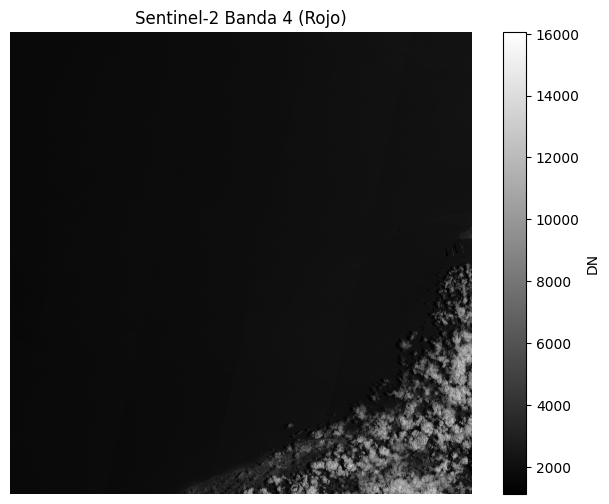

In [5]:
# Mostrar imagen en escala de grises
plt.figure(figsize=(8, 6))
plt.imshow(band4_sentinel, cmap='gray')
plt.title('Sentinel-2 Banda 4 (Rojo)')
plt.axis('off')
plt.colorbar(label='DN')
plt.show()


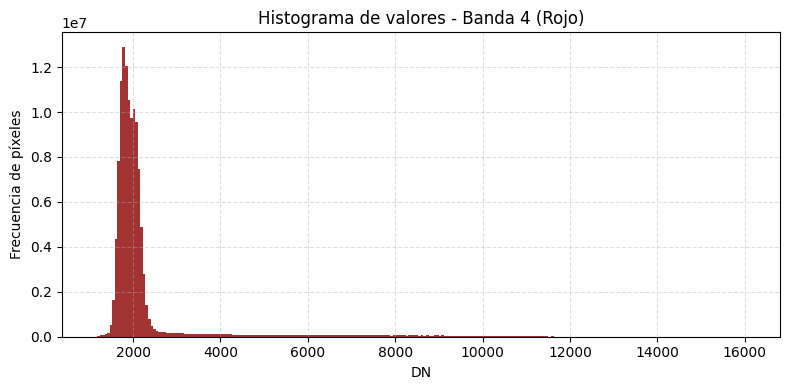

In [6]:

# Crear histograma de los valores de píxeles
plt.figure(figsize=(8, 4))
plt.hist(band4_sentinel.flatten(), bins=256, color='darkred', alpha=0.8)
plt.title('Histograma de valores - Banda 4 (Rojo)')
plt.xlabel('DN')
plt.ylabel('Frecuencia de píxeles')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [7]:
# Calcular estadísticas básicas
print("Estadísticas descriptivas de reflectancia:")
print(f"Cantidad de píxeles: {band4_sentinel.size}")
print(f"Min: {np.min(band4_sentinel):.4f}")
print(f"Max: {np.max(band4_sentinel):.4f}")
print(f"Media (mean): {np.mean(band4_sentinel):.4f}")
print(f"Mediana: {np.median(band4_sentinel):.4f}")
print(f"Desviación estándar (std): {np.std(band4_sentinel):.4f}")
print(f"Percentil 25: {np.percentile(band4_sentinel, 25):.4f}")
print(f"Percentil 75: {np.percentile(band4_sentinel, 75):.4f}")
print(f"Percentil 90: {np.percentile(band4_sentinel, 90):.4f}")

Estadísticas descriptivas de reflectancia:
Cantidad de píxeles: 120560400
Min: 1117.0000
Max: 16056.0000
Media (mean): 2267.4192
Mediana: 1926.0000
Desviación estándar (std): 1364.3328
Percentil 25: 1776.0000
Percentil 75: 2104.0000
Percentil 90: 2400.0000


### Reflectancia a nivel del suelo
L2A_SRi = (L2A_DNi + BOA_ADD_OFFSETi) / QUANTIFICATION_VALUE
donde
- BOA_ADD_OFFSETi = -1000 
- QUANTIFICATION_VALUE = 10000
- Digital Number DN=0 remains the “NO_DATA” value

In [8]:
BOA_ADD_OFFSET = -1000
QUANTIFICATION_VALUE = 10000

In [9]:
reflectancia_band4_sentinel = (band4_sentinel + BOA_ADD_OFFSET) / QUANTIFICATION_VALUE

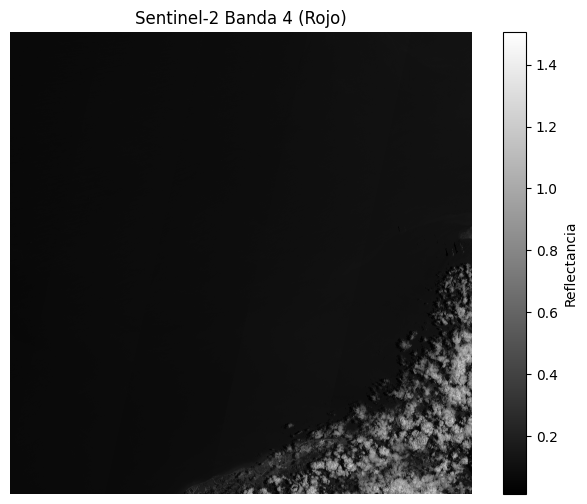

In [10]:
# Mostrar imagen en escala de grises
plt.figure(figsize=(8, 6))
plt.imshow(reflectancia_band4_sentinel, cmap='gray')
plt.title('Sentinel-2 Banda 4 (Rojo)')
plt.axis('off')
plt.colorbar(label='Reflectancia')
plt.show()

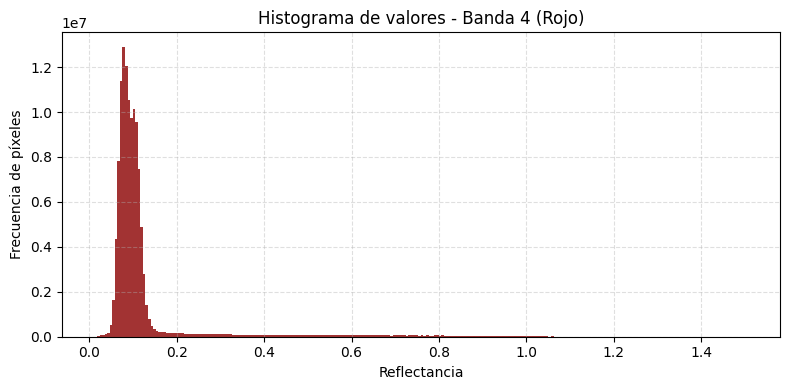

In [11]:

# Crear histograma de los valores de píxeles
plt.figure(figsize=(8, 4))
plt.hist(reflectancia_band4_sentinel.flatten(), bins=256, color='darkred', alpha=0.8)
plt.title('Histograma de valores - Banda 4 (Rojo)')
plt.xlabel('Reflectancia')
plt.ylabel('Frecuencia de píxeles')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [12]:
# Calcular estadísticas básicas
print("Estadísticas descriptivas de reflectancia:")
print(f"Cantidad de píxeles: {reflectancia_band4_sentinel.size}")
print(f"Min: {np.min(reflectancia_band4_sentinel):.4f}")
print(f"Max: {np.max(reflectancia_band4_sentinel):.4f}")
print(f"Media (mean): {np.mean(reflectancia_band4_sentinel):.4f}")
print(f"Mediana: {np.median(reflectancia_band4_sentinel):.4f}")
print(f"Desviación estándar (std): {np.std(reflectancia_band4_sentinel):.4f}")
print(f"Percentil 25: {np.percentile(reflectancia_band4_sentinel, 25):.4f}")
print(f"Percentil 75: {np.percentile(reflectancia_band4_sentinel, 75):.4f}")
print(f"Percentil 90: {np.percentile(reflectancia_band4_sentinel, 90):.4f}")

Estadísticas descriptivas de reflectancia:
Cantidad de píxeles: 120560400
Min: 0.0117
Max: 1.5056
Media (mean): 0.1267
Mediana: 0.0926
Desviación estándar (std): 0.1364
Percentil 25: 0.0776
Percentil 75: 0.1104
Percentil 90: 0.1400


## Banda 8 (Infrarrojo cercano NIR)

In [13]:
# Cargar el archivo TIFF Sentinel 2
file_path = 'data/S2A_MSIL2A_20250424T152711_N0511_R025_T18PYU_20250425T012413.SAFE/GRANULE/L2A_T18PYU_A051388_20250424T152706/IMG_DATA/R10m/T18PYU_20250424T152711_B08_10m.jp2'
src_sentinel_B8 = rasterio.open(file_path)

### Información general del raster

In [14]:
# Abrir y leer los datos
with rasterio.open(file_path) as src_sentinel_B8:
    band8_sentinel = src_sentinel_B8.read(1)
    width = src_sentinel_B8.width
    height = src_sentinel_B8.height
    bands = src_sentinel_B8.count
    meta = src_sentinel_B8.meta.copy()

# Imprimir dimensiones
print(f"Dimensiones datos (ancho x alto): {width} x {height}")
print(f"Número de bandas: {bands}")

Dimensiones datos (ancho x alto): 10980 x 10980
Número de bandas: 1


In [15]:
# Contar píxeles con valor 0
num_ceros = np.sum(band8_sentinel == 0)

print(f"Número de píxeles con valor 0: {num_ceros}")

Número de píxeles con valor 0: 0


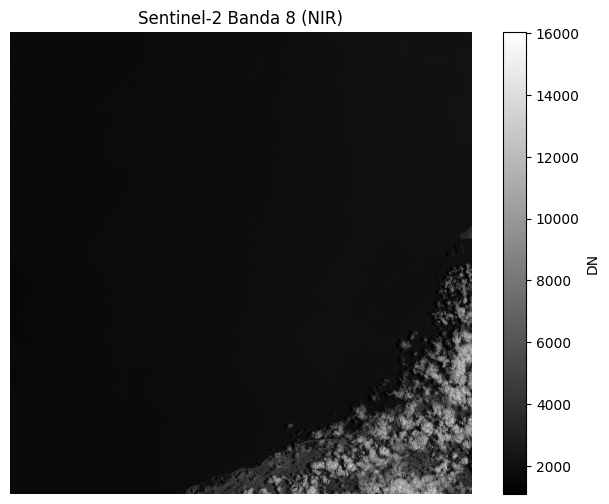

In [16]:
# Mostrar imagen en escala de grises
plt.figure(figsize=(8, 6))
plt.imshow(band8_sentinel, cmap='gray')
plt.title('Sentinel-2 Banda 8 (NIR)')
plt.axis('off')
plt.colorbar(label='DN')
plt.show()

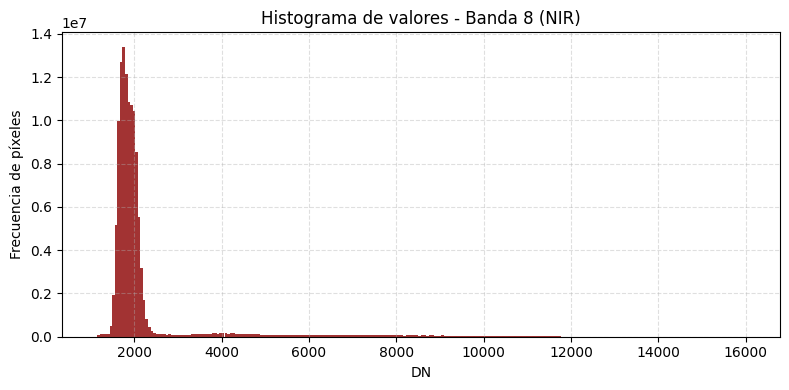

In [17]:
# Crear histograma de los valores de píxeles
plt.figure(figsize=(8, 4))
plt.hist(band8_sentinel.flatten(), bins=256, color='darkred', alpha=0.8)
plt.title('Histograma de valores - Banda 8 (NIR)')
plt.xlabel('DN')
plt.ylabel('Frecuencia de píxeles')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [18]:
# Calcular estadísticas básicas
print("Estadísticas descriptivas de reflectancia:")
print(f"Cantidad de píxeles: {band8_sentinel.size}")
print(f"Min: {np.min(band8_sentinel):.4f}")
print(f"Max: {np.max(band8_sentinel):.4f}")
print(f"Media (mean): {np.mean(band8_sentinel):.4f}")
print(f"Mediana: {np.median(band8_sentinel):.4f}")
print(f"Desviación estándar (std): {np.std(band8_sentinel):.4f}")
print(f"Percentil 25: {np.percentile(band8_sentinel, 25):.4f}")
print(f"Percentil 75: {np.percentile(band8_sentinel, 75):.4f}")
print(f"Percentil 90: {np.percentile(band8_sentinel, 90):.4f}")

Estadísticas descriptivas de reflectancia:
Cantidad de píxeles: 120560400
Min: 1088.0000
Max: 16040.0000
Media (mean): 2245.3581
Mediana: 1868.0000
Desviación estándar (std): 1431.0153
Percentil 25: 1728.0000
Percentil 75: 2036.0000
Percentil 90: 2366.0000


### Reflectancia a nivel del suelo
L2A_SRi = (L2A_DNi + BOA_ADD_OFFSETi) / QUANTIFICATION_VALUE
donde
- BOA_ADD_OFFSETi = -1000 
- QUANTIFICATION_VALUE = 10000
- Digital Number DN=0 remains the “NO_DATA” value

In [19]:
BOA_ADD_OFFSET = -1000
QUANTIFICATION_VALUE = 10000

In [20]:
reflectancia_band8_sentinel = (band8_sentinel + BOA_ADD_OFFSET) / QUANTIFICATION_VALUE

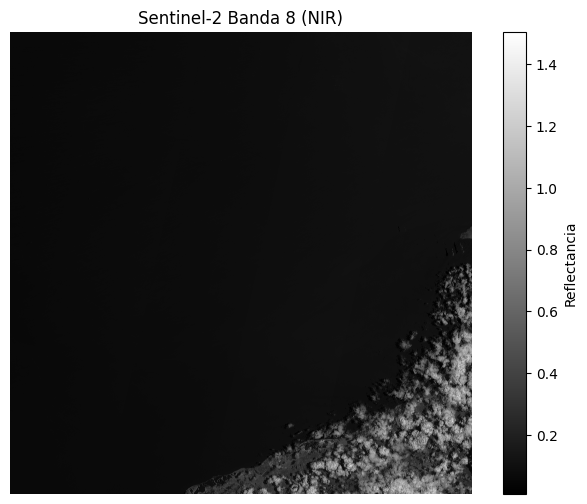

In [21]:
# Mostrar imagen en escala de grises
plt.figure(figsize=(8, 6))
plt.imshow(reflectancia_band8_sentinel, cmap='gray')
plt.title('Sentinel-2 Banda 8 (NIR)')
plt.axis('off')
plt.colorbar(label='Reflectancia')
plt.show()

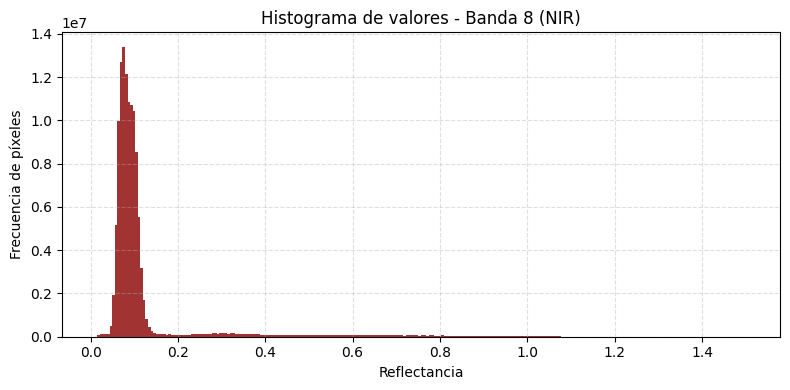

In [22]:
# Crear histograma de los valores de píxeles
plt.figure(figsize=(8, 4))
plt.hist(reflectancia_band8_sentinel.flatten(), bins=256, color='darkred', alpha=0.8)
plt.title('Histograma de valores - Banda 8 (NIR)')
plt.xlabel('Reflectancia')
plt.ylabel('Frecuencia de píxeles')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [23]:
# Calcular estadísticas básicas
print("Estadísticas descriptivas de reflectancia:")
print(f"Cantidad de píxeles: {reflectancia_band8_sentinel.size}")
print(f"Min: {np.min(reflectancia_band8_sentinel):.4f}")
print(f"Max: {np.max(reflectancia_band8_sentinel):.4f}")
print(f"Media (mean): {np.mean(reflectancia_band8_sentinel):.4f}")
print(f"Mediana: {np.median(reflectancia_band8_sentinel):.4f}")
print(f"Desviación estándar (std): {np.std(reflectancia_band8_sentinel):.4f}")
print(f"Percentil 25: {np.percentile(reflectancia_band8_sentinel, 25):.4f}")
print(f"Percentil 75: {np.percentile(reflectancia_band8_sentinel, 75):.4f}")
print(f"Percentil 90: {np.percentile(reflectancia_band8_sentinel, 90):.4f}")

Estadísticas descriptivas de reflectancia:
Cantidad de píxeles: 120560400
Min: 0.0088
Max: 1.5040
Media (mean): 0.1245
Mediana: 0.0868
Desviación estándar (std): 0.1431
Percentil 25: 0.0728
Percentil 75: 0.1036
Percentil 90: 0.1366


## NDVI

NDVI (Sentinel 2) = (B8 – B4) / (B8 + B4)

### Con SR

In [24]:
NDVI_sentinel_SR = (reflectancia_band8_sentinel - reflectancia_band4_sentinel) / (reflectancia_band8_sentinel + reflectancia_band4_sentinel)

In [25]:
# Calcular estadísticas básicas
print("Estadísticas descriptivas de NDVI empleando datos de reflectancia:")
print(f"Cantidad de píxeles: {NDVI_sentinel_SR.size}")
print(f"Min: {np.min(NDVI_sentinel_SR):.4f}")
print(f"Max: {np.max(NDVI_sentinel_SR):.4f}")
print(f"Media (mean): {np.mean(NDVI_sentinel_SR):.4f}")
print(f"Mediana: {np.median(NDVI_sentinel_SR):.4f}")
print(f"Desviación estándar (std): {np.std(NDVI_sentinel_SR):.4f}")
print(f"Percentil 25: {np.percentile(NDVI_sentinel_SR, 25):.4f}")
print(f"Percentil 75: {np.percentile(NDVI_sentinel_SR, 75):.4f}")
print(f"Percentil 90: {np.percentile(NDVI_sentinel_SR, 90):.4f}")

Estadísticas descriptivas de NDVI empleando datos de reflectancia:
Cantidad de píxeles: 120560400
Min: -0.8050
Max: 0.7852
Media (mean): -0.0244
Mediana: -0.0288
Desviación estándar (std): 0.0652
Percentil 25: -0.0614
Percentil 75: 0.0059
Percentil 90: 0.0412


#### Guardar los resultados

In [26]:
# Actualizar metadatos para archivo NDVI
meta.update({
    "count": 1,
    "dtype": "float32",
    "driver": "GTiff",
    "nodata": np.nan
})

# Guardar el archivo NDVI
output_path = "data/NDVI_sentinel_SR.tif"

with rasterio.open(output_path, 'w', **meta) as dst:
    dst.write(NDVI_sentinel_SR.astype(np.float32), 1)

### con DN

In [27]:
NDVI_sentinel_DN = (band8_sentinel - band4_sentinel) / (band8_sentinel + band4_sentinel)

In [28]:
# Calcular estadísticas básicas
print("Estadísticas descriptivas de NDVI empleando datos de DN:")
print(f"Cantidad de píxeles: {NDVI_sentinel_DN.size}")
print(f"Min: {np.min(NDVI_sentinel_DN):.6f}")
print(f"Max: {np.max(NDVI_sentinel_DN):.6f}")
print(f"Media (mean): {np.mean(NDVI_sentinel_DN):.6f}")
print(f"Mediana: {np.median(NDVI_sentinel_DN):.6f}")
print(f"Desviación estándar (std): {np.std(NDVI_sentinel_DN):.6f}")
print(f"Percentil 25: {np.percentile(NDVI_sentinel_DN, 25):.6f}")
print(f"Percentil 75: {np.percentile(NDVI_sentinel_DN, 75):.6f}")
print(f"Percentil 90: {np.percentile(NDVI_sentinel_DN, 90):.6f}")

Estadísticas descriptivas de NDVI empleando datos de DN:
Cantidad de píxeles: 120560400
Min: 0.000000
Max: 29.422282
Media (mean): 12.191014
Mediana: 16.263236
Desviación estándar (std): 8.075974
Percentil 25: 0.047475
Percentil 75: 18.173792
Percentil 90: 19.325362
